# H2O Tutorial

Author: Spencer Aiello

Contact: spencer@h2oai.com

## Setting up your system for this demo

The following code creates two csv files using data from the [Boston Housing dataset](https://archive.ics.uci.edu/ml/datasets/Housing) which is built into scikit-learn and adds them to the local directory

In [1]:
import pandas as pd
import numpy
from numpy.random import choice
from sklearn.datasets import load_boston

import h2o
h2o.init()

H2O cluster uptime:,13 seconds 605 milliseconds
H2O cluster version:,3.1.0.99999
H2O cluster name:,spIdea
H2O cluster total nodes:,1
H2O cluster total memory:,12.44 GB
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321


In [2]:
# transfer the boston data from pandas to H2O
boston_data = load_boston()
X = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
X["Median_value"] = boston_data.target
X = h2o.H2OFrame(python_obj=X.to_dict("list"))


Parse Progress: [##################################################] 100%
Uploaded pyc1632f0f-f7aa-4e40-bf9b-99605f0eeb1a into cluster with 506 rows and 14 cols


In [3]:
# select 10% for valdation
r = X.runif(seed=123456789)
train = X[r < 0.9,:]
valid = X[r >= 0.9,:]

h2o.export_file(train, "Boston_housing_train.csv", force=True)
h2o.export_file(valid, "Boston_housing_test.csv", force=True)


Export File Progress: [##################################################] 100%

Export File Progress: [##################################################] 100%


Enable inline plotting in the Jupyter Notebook

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction 

The purpose of this notebook is to provide an introduction to H2O's syntax and capabilities. It is not meant to be a tutorial on machine learning or algorithms.

## Intro to H2O Data Munging

Read csv data into H2O.

In [5]:
fr = h2o.import_file("Boston_housing_train.csv")


Parse Progress: [##################################################] 100%
Imported Boston_housing_train.csv. Parsed 462 rows and 14 cols


View the top

In [6]:
fr.head()

H2OFrame with 10 rows and 14 columns: 
      CRIM    ZN       B  LSTAT  Median_value    AGE  TAX  RAD  CHAS    NOX  \
1  0.02729   0.0  392.83   4.03          34.7   61.1  242    2     0  0.469   
2  0.03237   0.0  394.63   2.94          33.4   45.8  222    3     0  0.458   
3  0.06905   0.0  396.90   5.33          36.2   54.2  222    3     0  0.458   
4  0.02985   0.0  394.12   5.21          28.7   58.7  222    3     0  0.458   
5  0.08829  12.5  395.60  12.43          22.9   66.6  311    5     0  0.524   
6  0.14455  12.5  396.90  19.15          27.1   96.1  311    5     0  0.524   
7  0.21124  12.5  386.63  29.93          16.5  100.0  311    5     0  0.524   
8  0.17004  12.5  386.71  17.10          18.9   85.9  311    5     0  0.524   
9  0.22489  12.5  392.52  20.45          15.0   94.3  311    5     0  0.524   

      RM  INDUS  PTRATIO     DIS  
1  7.185   7.07     17.8  4.9671  
2  6.998   2.18     18.7  6.0622  
3  7.147   2.18     18.7  6.0622  
4  6.430   2.18     18.7  6.06

View the bottom

In [7]:
fr.tail()

H2OFrame with 10 rows and 14 columns: 
      CRIM  ZN       B  LSTAT  Median_value   AGE  TAX  RAD  CHAS    NOX  \
1  0.26838   0  396.90  14.10          18.3  70.6  391    6     0  0.585   
2  0.23912   0  396.90  12.92          21.2  65.3  391    6     0  0.585   
3  0.17783   0  395.77  15.10          17.5  73.5  391    6     0  0.585   
4  0.22438   0  396.90  14.33          16.8  79.7  391    6     0  0.585   
5  0.06263   0  391.99   9.67          22.4  69.1  273    1     0  0.573   
6  0.04527   0  396.90   9.08          20.6  76.7  273    1     0  0.573   
7  0.06076   0  396.90   5.64          23.9  91.0  273    1     0  0.573   
8  0.10959   0  393.45   6.48          22.0  89.3  273    1     0  0.573   
9  0.04741   0  396.90   7.88          11.9  80.8  273    1     0  0.573   

      RM  INDUS  PTRATIO     DIS  
1  5.794   9.69     19.2  2.8927  
2  6.019   9.69     19.2  2.4091  
3  5.569   9.69     19.2  2.3999  
4  6.027   9.69     19.2  2.4982  
5  6.593  11.93     21.0 

Select a column

fr["VAR_NAME"]

In [8]:
fr["CRIM"].head() # Tab completes

H2OFrame with 10 rows and 1 columns: 
      CRIM
1  0.02729
2  0.03237
3  0.06905
4  0.02985
5  0.08829
6  0.14455
7  0.21124
8  0.17004
9  0.22489


Select a few columns

In [9]:
columns = ["CRIM", "RM", "RAD"]
fr[columns].head()

H2OFrame with 10 rows and 3 columns: 
      CRIM  RAD     RM
1  0.02729    2  7.185
2  0.03237    3  6.998
3  0.06905    3  7.147
4  0.02985    3  6.430
5  0.08829    5  6.012
6  0.14455    5  6.172
7  0.21124    5  5.631
8  0.17004    5  6.004
9  0.22489    5  6.377


Select a subset of rows

Unlike in Pandas, columns may be identified by index or column name. **Therefore, when subsetting by rows, you must also pass the column selection.**

In [10]:
fr[2:7,:]  # explicitly select all columns with :

H2OFrame with 5 rows and 14 columns: 
      CRIM    ZN       B  LSTAT  Median_value   AGE  TAX  RAD  CHAS    NOX  \
1  0.06905   0.0  396.90   5.33          36.2  54.2  222    3     0  0.458   
2  0.02985   0.0  394.12   5.21          28.7  58.7  222    3     0  0.458   
3  0.08829  12.5  395.60  12.43          22.9  66.6  311    5     0  0.524   
4  0.14455  12.5  396.90  19.15          27.1  96.1  311    5     0  0.524   

      RM  INDUS  PTRATIO     DIS  
1  7.147   2.18     18.7  6.0622  
2  6.430   2.18     18.7  6.0622  
3  6.012   7.87     15.2  5.5605  
4  6.172   7.87     15.2  5.9505  


Key attributes:
      * columns, names, col_names
      * len, shape, dim, nrow, ncol
      * types
      
Note: 

Since the data is _not_ in local python memory
there is no "values" attribute. If you want to 
pull all of the data into the local python memory
then do so explicitly with h2o.export_file and
reading the data into python memory from disk.

In [11]:
# The columns attribute is exactly like Pandas
print "Columns:", fr.columns, "\n"
print "Columns:", fr.names, "\n"
print "Columns:", fr.col_names, "\n"

# There are a number of attributes to get at the shape
print "length:", str( len(fr) ), "\n"
print "shape:", fr.shape, "\n"
print "dim:", fr.dim, "\n"
print "nrow:", fr.nrow, "\n"
print "ncol:", fr.ncol, "\n"

# Use the "types" attribute to list the column types
print "types:", fr.types, "\n"

Columns: [u'CRIM', u'ZN', u'B', u'LSTAT', u'Median_value', u'AGE', u'TAX', u'RAD', u'CHAS', u'NOX', u'RM', u'INDUS', u'PTRATIO', u'DIS'] 

Columns: [u'CRIM', u'ZN', u'B', u'LSTAT', u'Median_value', u'AGE', u'TAX', u'RAD', u'CHAS', u'NOX', u'RM', u'INDUS', u'PTRATIO', u'DIS'] 

Columns: [u'CRIM', u'ZN', u'B', u'LSTAT', u'Median_value', u'AGE', u'TAX', u'RAD', u'CHAS', u'NOX', u'RM', u'INDUS', u'PTRATIO', u'DIS'] 

length: 462 

shape: (462, 14) 

dim: [462, 14] 

nrow: 462 

ncol: 14 

types: {u'CRIM': u'Numeric', u'ZN': u'Numeric', u'B': u'Numeric', u'LSTAT': u'Numeric', u'Median_value': u'Numeric', u'AGE': u'Numeric', u'TAX': u'Numeric', u'RAD': u'Numeric', u'CHAS': u'Numeric', u'NOX': u'Numeric', u'RM': u'Numeric', u'INDUS': u'Numeric', u'PTRATIO': u'Numeric', u'DIS': u'Numeric'} 



Select rows based on value

In [12]:
fr.shape

(462, 14)

In [13]:
mask = fr["CRIM"]>1
fr[mask,:].shape

(155, 14)

Get summary statistics of the data and additional data distribution information.

In [14]:
fr.describe()

Rows: 462 Cols: 14
  chunk_type                 chunk_name  count  count_percentage        size  \
0        CBS                       Bits      1          7.142858      128  B   
1        C1N  1-Byte Integers (w/o NAs)      1          7.142858      530  B   
2         C2            2-Byte Integers      1          7.142858      992  B   
3        C2S           2-Byte Fractions      1          7.142858     1008  B   
4        C8D               64-bit Reals     10         71.428570     36.8 KB   

   size_percentage  
0         0.317634  
1         1.315202  
2         2.461661  
3         2.501365  
4        93.404140  
                            size  number_of_rows  number_of_chunks_per_column  \
0  172.16.2.65:54321     39.4 KB             462                            1   
1               mean     39.4 KB             462                            1   
2                min     39.4 KB             462                            1   
3                max     39.4 KB             462  

,CRIM,ZN,B,LSTAT,Median_value,AGE,TAX,RAD,CHAS,NOX,RM,INDUS,PTRATIO,DIS
type,real,real,real,real,real,real,int,int,int,real,real,real,real,real
mins,0.00632,0.0,0.32,1.73,5.0,6.0,187.0,1.0,0.0,0.385,3.561,0.46,12.6,1.1296
maxs,88.9762,100.0,396.9,37.97,50.0,100.0,711.0,24.0,1.0,0.871,8.78,27.74,22.0,12.1265
sigma,8.68268014543,23.2086423052,90.7500779002,7.1419482934,9.21258527358,27.9631409743,167.460295078,8.64357146773,0.242812755044,0.115349440715,0.707139172922,6.85982058776,2.16522966932,2.11032018051
zero_count,0,343,0,0,0,0,0,0,433,0,0,0,0,0
missing_count,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Set up the predictor and response column names

Using H2O algorithms, it's easier to reference predictor and response columns
by name in a single frame (i.e., don't split up X and y)

In [15]:
x = fr.names
y="Median_value"
x.remove(y)

## Machine Learning With H2O

H2O is a machine learning library built in Java with interfaces in Python, R, Scala, and Javascript. It is [open source](http://github.com/h2oai) and [well-documented](http://docs.h2o.ai).

Unlike Scikit-learn, H2O allows for categorical and missing data.

The basic work flow is as follows:
* Fit the training data with a machine learning algorithm
* Predict on the testing data

### Simple model

In [16]:
model = h2o.random_forest(x=fr[:400,x],y=fr[:400,y],seed=42) # Define and fit first 400 points


drf Model Build Progress: [##################################################] 100%


In [17]:
model.predict(fr[400:,:])        # Predict the rest

H2OFrame with 62 rows and 1 columns: 
   predict
1   10.266
2   10.480
3   12.416
4   10.462
5   14.062
6   16.392
7   14.582
8   14.836
9   15.867


The performance of the model can be checked using the holdout dataset

In [18]:
perf = model.model_performance(fr[400:,:])
perf.r2()      # get the r2 on the holdout data
perf.mse()     # get the mse on the holdout data
perf           # display the performance object


ModelMetricsRegression: drf
** Reported on test data. **

MSE: 14.1917271618
R^2: 0.374431026605
Mean Residual Deviance: 14.1917271618


### Train-Test Split

Instead of taking the first 400 observations for training, we can use H2O to create a random test train split of the data.

In [19]:
r = fr.runif(seed=12345)   # build random uniform column over [0,1]
train= fr[r<0.75,:]     # perform a 75-25 split
test = fr[r>=0.75,:]

model = h2o.random_forest(x=train[x],y=train[y],seed=42)

perf = model.model_performance(test)
perf.r2()


drf Model Build Progress: [##################################################] 100%


0.8542968512013444

There was a massive jump in the R^2 value. This is because the original data is not shuffled.

### Cross validation

H2O's machine learning algorithms take an optional parameter **nfolds** to specify the number of cross-validation folds to build. H2O's cross-validation uses an internal weight vector to build the folds in an efficient manner (instead of physically building the splits).

In conjunction with the **nfolds** parameter, a user may specify the way in which observations are assigned to each fold with the **fold_assignment** parameter, which can be set to either:
        * AUTO:  Perform random assignment
        * Random: Each row has a equal (1/nfolds) chance of being in any fold.
        * Modulo: Observations are in/out of the fold based by modding on nfolds

In [20]:
model = h2o.random_forest(x=fr[x],y=fr[y], nfolds=10) # build a 10-fold cross-validated model


drf Model Build Progress: [##################################################] 100%


In [21]:
scores = numpy.array([m.r2() for m in model.xvals]) # iterate over the xval models using the xvals attribute
print "Expected R^2: %.2f +/- %.2f \n" % (scores.mean(), scores.std()*1.96)
print "Scores:", scores.round(2)

Expected R^2: 0.87 +/- 0.03 

Scores: [ 0.87  0.87  0.86  0.88  0.86  0.88  0.87  0.84  0.86  0.86]


However, you can still make use of the cross_val_score from Scikit-Learn

### Cross validation: H2O and Scikit-Learn

In [22]:
from sklearn.cross_validation import cross_val_score
from h2o.cross_validation import H2OKFold
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.model.regression import h2o_r2_score
from sklearn.metrics.scorer import make_scorer

You still must use H2O to make the folds. Currently, there is no H2OStratifiedKFold. Additionally, the H2ORandomForestEstimator is analgous to the scikit-learn RandomForestRegressor object with its own ``fit`` method

In [23]:
model = H2ORandomForestEstimator(seed=42)

In [24]:
scorer = make_scorer(h2o_r2_score)   # make h2o_r2_score into a scikit_learn scorer
custom_cv = H2OKFold(fr, n_folds=10, seed=42) # make a cv 
scores = cross_val_score(model, fr[x], fr[y], scoring=scorer, cv=custom_cv)

print "Expected R^2: %.2f +/- %.2f \n" % (scores.mean(), scores.std()*1.96)
print "Scores:", scores.round(2)


drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%

drf Model Build Progress: [##################################################] 100%
Expected R^2: 0.87 +/- 0.11 

Scores: [ 0.81  0.85  0.88  0.95  0.75  0.83  0.88  0.92  0.89  0.91]


There isn't much difference in the R^2 value since the fold strategy is exactly the same. However, there was a major difference in terms of computation time and memory usage.

Since the progress bar print out gets annoying let's disable that

In [23]:
h2o.__PROGRESS_BAR__=False
h2o.no_progress()

### Grid Search

Grid search in H2O is still under active development and it will be available very soon. However, it is possible to make use of Scikit's grid search infrastructure (with some performance penalties)

### Randomized grid search: H2O and Scikit-Learn

In [24]:
from sklearn import __version__
sklearn_version = __version__
print sklearn_version

0.17.dev0


If you have 0.16.1, then your system can't handle complex randomized grid searches (it works in every other version of sklearn, including the soon to be released 0.16.2 and the older versions).

The steps to perform a randomized grid search:
1. Import model and RandomizedSearchCV
2. Define model
3. Specify parameters to test
4. Define grid search object
5. Fit data to grid search object
6. Collect scores

All the steps will be repeated from above.

Because 0.16.1 is installed, we use scipy to define specific distributions

In [25]:
%%time
from h2o.estimators.random_forest import H2ORandomForestEstimator  # Import model
from sklearn.grid_search import RandomizedSearchCV  # Import grid search
from scipy.stats import randint, uniform

model = H2ORandomForestEstimator(seed=42)        # Define model

params = {"ntrees": randint(20,50),
          "max_depth": randint(1,10),
          "min_rows": randint(1,10),    # scikit's  min_samples_leaf
          "mtries": randint(2,fr[x].shape[1]),} # Specify parameters to test

scorer = make_scorer(h2o_r2_score)   # make h2o_r2_score into a scikit_learn scorer
custom_cv = H2OKFold(fr, n_folds=10, seed=42) # make a cv 
random_search = RandomizedSearchCV(model, params, 
                                   n_iter=30, 
                                   scoring=scorer, 
                                   cv=custom_cv, 
                                   random_state=42,
                                   n_jobs=-1)       # Define grid search object, launch jobs in parallel

random_search.fit(fr[x], fr[y])

print "Best R^2:", random_search.best_score_, "\n"
print "Best params:", random_search.best_params_

H2OFrame with 10 rows and 14 columns: 
      CRIM    ZN       B  LSTAT  Median_value    AGE  TAX  RAD  CHAS    NOX  \
1  0.02729   0.0  392.83   4.03          34.7   61.1  242    2     0  0.469   
2  0.03237   0.0  394.63   2.94          33.4   45.8  222    3     0  0.458   
3  0.06905   0.0  396.90   5.33          36.2   54.2  222    3     0  0.458   
4  0.02985   0.0  394.12   5.21          28.7   58.7  222    3     0  0.458   
5  0.08829  12.5  395.60  12.43          22.9   66.6  311    5     0  0.524   
6  0.14455  12.5  396.90  19.15          27.1   96.1  311    5     0  0.524   
7  0.21124  12.5  386.63  29.93          16.5  100.0  311    5     0  0.524   
8  0.17004  12.5  386.71  17.10          18.9   85.9  311    5     0  0.524   
9  0.22489  12.5  392.52  20.45          15.0   94.3  311    5     0  0.524   

      RM  INDUS  PTRATIO     DIS  
1  7.185   7.07     17.8  4.9671  
2  6.998   2.18     18.7  6.0622  
3  7.147   2.18     18.7  6.0622  
4  6.430   2.18     18.7  6.06

JoblibEnvironmentError: JoblibEnvironmentError
___________________________________________________________________________
Multiprocessing exception:
    ...........................................................................
/usr/local/Cellar/python/2.7.9/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py in _run_module_as_main(mod_name='IPython.kernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/Library/Python/2.7/site-packages/IPython/kernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'IPython.kernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/usr/local/Cellar/python/2.7.9/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x102cf60b0, file "/Lib...ite-packages/IPython/kernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Library/Python/2.7/site-packages/IPython/kernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'IPython.kernel', 'app': <module 'IPython.kernel.zmq.kernelapp' from '/Li.../site-packages/IPython/kernel/zmq/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Library/Python/2.7/site-packages/IPython/kernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='IPython.kernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x102cf60b0, file "/Lib...ite-packages/IPython/kernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Library/Python/2.7/site-packages/IPython/kernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'IPython.kernel', 'app': <module 'IPython.kernel.zmq.kernelapp' from '/Li.../site-packages/IPython/kernel/zmq/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Library/Python/2.7/site-packages/IPython/kernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from IPython.kernel.zmq import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Library/Python/2.7/site-packages/IPython/config/application.py in launch_instance(cls=<class 'IPython.kernel.zmq.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    569         
    570         If a global instance already exists, this reinitializes and starts it
    571         """
    572         app = cls.instance(**kwargs)
    573         app.initialize(argv)
--> 574         app.start()
        app.start = <bound method IPKernelApp.start of <IPython.kernel.zmq.kernelapp.IPKernelApp object>>
    575 
    576 #-----------------------------------------------------------------------------
    577 # utility functions, for convenience
    578 #-----------------------------------------------------------------------------

...........................................................................
/Library/Python/2.7/site-packages/IPython/kernel/zmq/kernelapp.py in start(self=<IPython.kernel.zmq.kernelapp.IPKernelApp object>)
    369     def start(self):
    370         if self.poller is not None:
    371             self.poller.start()
    372         self.kernel.start()
    373         try:
--> 374             ioloop.IOLoop.instance().start()
    375         except KeyboardInterrupt:
    376             pass
    377 
    378 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/Library/Python/2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    835                 self._events.update(event_pairs)
    836                 while self._events:
    837                     fd, events = self._events.popitem()
    838                     try:
    839                         fd_obj, handler_func = self._handlers[fd]
--> 840                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    841                     except (OSError, IOError) as e:
    842                         if errno_from_exception(e) == errno.EPIPE:
    843                             # Happens when the client closes the connection
    844                             pass

...........................................................................
/Library/Python/2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/usr/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Library/Python/2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Library/Python/2.7/site-packages/IPython/kernel/zmq/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    247         if self.control_stream:
    248             self.control_stream.on_recv(self.dispatch_control, copy=False)
    249 
    250         def make_dispatcher(stream):
    251             def dispatcher(msg):
--> 252                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    253             return dispatcher
    254 
    255         for s in self.shell_streams:
    256             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Library/Python/2.7/site-packages/IPython/kernel/zmq/kernelbase.py in dispatch_shell(self=<IPython.kernel.zmq.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\nfrom h2o.estimators.random_forest import ...\nprint "Best params:", random_search.best_params_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'msg_id': 'EDD3C65FFB89474E8F77C048DE3B0458', 'msg_type': 'execute_request', 'session': '0852636473464D76A2F16266B5EA897E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'EDD3C65FFB89474E8F77C048DE3B0458', 'msg_type': 'execute_request', 'parent_header': {}})
    208         else:
    209             # ensure default_int_handler during handler call
    210             sig = signal(SIGINT, default_int_handler)
    211             self.log.debug("%s: %s", msg_type, msg)
    212             try:
--> 213                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <IPython.kernel.zmq.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['0852636473464D76A2F16266B5EA897E']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\nfrom h2o.estimators.random_forest import ...\nprint "Best params:", random_search.best_params_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'msg_id': 'EDD3C65FFB89474E8F77C048DE3B0458', 'msg_type': 'execute_request', 'session': '0852636473464D76A2F16266B5EA897E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'EDD3C65FFB89474E8F77C048DE3B0458', 'msg_type': 'execute_request', 'parent_header': {}}
    214             except Exception:
    215                 self.log.error("Exception in message handler:", exc_info=True)
    216             finally:
    217                 signal(SIGINT, sig)

...........................................................................
/Library/Python/2.7/site-packages/IPython/kernel/zmq/kernelbase.py in execute_request(self=<IPython.kernel.zmq.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['0852636473464D76A2F16266B5EA897E'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\nfrom h2o.estimators.random_forest import ...\nprint "Best params:", random_search.best_params_', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'msg_id': 'EDD3C65FFB89474E8F77C048DE3B0458', 'msg_type': 'execute_request', 'session': '0852636473464D76A2F16266B5EA897E', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'EDD3C65FFB89474E8F77C048DE3B0458', 'msg_type': 'execute_request', 'parent_header': {}})
    357         if not silent:
    358             self.execution_count += 1
    359             self._publish_execute_input(code, parent, self.execution_count)
    360         
    361         reply_content = self.do_execute(code, silent, store_history,
--> 362                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    363 
    364         # Flush output before sending the reply.
    365         sys.stdout.flush()
    366         sys.stderr.flush()

...........................................................................
/Library/Python/2.7/site-packages/IPython/kernel/zmq/ipkernel.py in do_execute(self=<IPython.kernel.zmq.ipkernel.IPythonKernel object>, code=u'%%time\nfrom h2o.estimators.random_forest impo...print "Best params:", random_search.best_params_', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    176 
    177         reply_content = {}
    178         # FIXME: the shell calls the exception handler itself.
    179         shell._reply_content = None
    180         try:
--> 181             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <I....kernel.zmq.zmqshell.ZMQInteractiveShell object>>
        code = u'%%time\nfrom h2o.estimators.random_forest impo...print "Best params:", random_search.best_params_'
        store_history = True
        silent = False
    182         except:
    183             status = u'error'
    184             # FIXME: this code right now isn't being used yet by default,
    185             # because the run_cell() call above directly fires off exception

...........................................................................
/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, raw_cell=u'%%time\nfrom h2o.estimators.random_forest impo...print "Best params:", random_search.best_params_', store_history=True, silent=False, shell_futures=True)
   2863                 self.displayhook.exec_result = result
   2864 
   2865                 # Execute the user code
   2866                 interactivity = "none" if silent else self.ast_node_interactivity
   2867                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2868                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2869 
   2870                 # Reset this so later displayed values do not modify the
   2871                 # ExecutionResult
   2872                 self.displayhook.exec_result = None

...........................................................................
/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-25-0a43147e1e11>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   2973                     return True
   2974 
   2975             for i, node in enumerate(to_run_interactive):
   2976                 mod = ast.Interactive([node])
   2977                 code = compiler(mod, cell_name, "single")
-> 2978                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <I....kernel.zmq.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1090009b0, file "<ipython-input-25-0a43147e1e11>", line 1>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   2979                     return True
   2980 
   2981             # Flush softspace
   2982             if softspace(sys.stdout, 0):

...........................................................................
/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1090009b0, file "<ipython-input-25-0a43147e1e11>", line 1>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3027         outflag = 1  # happens in more places, so it's easier as default
   3028         try:
   3029             try:
   3030                 self.hooks.pre_run_code_hook()
   3031                 #rprint('Running code', repr(code_obj)) # dbg
-> 3032                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1090009b0, file "<ipython-input-25-0a43147e1e11>", line 1>
        self.user_global_ns = {'H2OKFold': <class h2o.cross_validation.H2OKFold>, 'H2ORandomForestEstimator': <class 'h2o.estimators.random_forest.H2ORandomForestEstimator'>, 'In': ['', u'import pandas as pd\nimport numpy\nfrom numpy....ets import load_boston\n\nimport h2o\nh2o.init()', u'# transfer the boston data from pandas to H2O\...\nX = h2o.H2OFrame(python_obj=X.to_dict("list"))', u'# select 10% for valdation\nr = X.runif(seed=1...le(valid, "Boston_housing_test.csv", force=True)', u"get_ipython().magic(u'matplotlib inline')\nimport matplotlib.pyplot as plt", u'fr = h2o.import_file("Boston_housing_train.csv")', u'fr.head()', u'fr.tail()', u'fr["CRIM"].head() # Tab completes', u'columns = ["CRIM", "RM", "RAD"]\nfr[columns].head()', u'fr[2:7,:]  # explicitly select all columns with :', u'# The columns attribute is exactly like Pandas...he column types\nprint "types:", fr.types, "\\n"', u'fr.shape', u'mask = fr["CRIM"]>1\nfr[mask,:].shape', u'fr.describe()', u'x = fr.names\ny="Median_value"\nx.remove(y)', u'model = h2o.random_forest(x=fr[:400,x],y=fr[:400,y],seed=42) # Define and fit first 400 points', u'model.predict(fr[400:,:])        # Predict the rest', u'perf = model.model_performance(fr[400:,:])\npe...nperf           # display the performance object', u'r = fr.runif(seed=12345)   # build random unif...nperf = model.model_performance(test)\nperf.r2()', ...], 'Out': {6: , 7: , 8: , 9: , 10: , 12: (462, 14), 13: (155, 14), 17: , 18: , 19: 0.8542968512013444}, 'RandomizedSearchCV': <class 'sklearn.grid_search.RandomizedSearchCV'>, 'X': , '_': 0.8542968512013444, '_10': , '_12': (462, 14), '_13': (155, 14), ...}
        self.user_ns = {'H2OKFold': <class h2o.cross_validation.H2OKFold>, 'H2ORandomForestEstimator': <class 'h2o.estimators.random_forest.H2ORandomForestEstimator'>, 'In': ['', u'import pandas as pd\nimport numpy\nfrom numpy....ets import load_boston\n\nimport h2o\nh2o.init()', u'# transfer the boston data from pandas to H2O\...\nX = h2o.H2OFrame(python_obj=X.to_dict("list"))', u'# select 10% for valdation\nr = X.runif(seed=1...le(valid, "Boston_housing_test.csv", force=True)', u"get_ipython().magic(u'matplotlib inline')\nimport matplotlib.pyplot as plt", u'fr = h2o.import_file("Boston_housing_train.csv")', u'fr.head()', u'fr.tail()', u'fr["CRIM"].head() # Tab completes', u'columns = ["CRIM", "RM", "RAD"]\nfr[columns].head()', u'fr[2:7,:]  # explicitly select all columns with :', u'# The columns attribute is exactly like Pandas...he column types\nprint "types:", fr.types, "\\n"', u'fr.shape', u'mask = fr["CRIM"]>1\nfr[mask,:].shape', u'fr.describe()', u'x = fr.names\ny="Median_value"\nx.remove(y)', u'model = h2o.random_forest(x=fr[:400,x],y=fr[:400,y],seed=42) # Define and fit first 400 points', u'model.predict(fr[400:,:])        # Predict the rest', u'perf = model.model_performance(fr[400:,:])\npe...nperf           # display the performance object', u'r = fr.runif(seed=12345)   # build random unif...nperf = model.model_performance(test)\nperf.r2()', ...], 'Out': {6: , 7: , 8: , 9: , 10: , 12: (462, 14), 13: (155, 14), 17: , 18: , 19: 0.8542968512013444}, 'RandomizedSearchCV': <class 'sklearn.grid_search.RandomizedSearchCV'>, 'X': , '_': 0.8542968512013444, '_10': , '_12': (462, 14), '_13': (155, 14), ...}
   3033             finally:
   3034                 # Reset our crash handler in place
   3035                 sys.excepthook = old_excepthook
   3036         except SystemExit as e:

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/<ipython-input-25-0a43147e1e11> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 get_ipython().run_cell_magic(u'time', u'', u'from h2o.estimators.random_forest import H2ORandomForestEstimator  # Import model\nfrom sklearn.grid_search import RandomizedSearchCV  # Import grid search\nfrom scipy.stats import randint, uniform\n\nmodel = H2ORandomForestEstimator(seed=42)        # Define model\n\nparams = {"ntrees": randint(20,50),\n          "max_depth": randint(1,10),\n          "min_rows": randint(1,10),    # scikit\'s  min_samples_leaf\n          "mtries": randint(2,fr[x].shape[1]),} # Specify parameters to test\n\nscorer = make_scorer(h2o_r2_score)   # make h2o_r2_score into a scikit_learn scorer\ncustom_cv = H2OKFold(fr, n_folds=10, seed=42) # make a cv \nrandom_search = RandomizedSearchCV(model, params, \n                                   n_iter=30, \n                                   scoring=scorer, \n                                   cv=custom_cv, \n                                   random_state=42,\n                                   n_jobs=-1)       # Define grid search object, launch jobs in parallel\n\nrandom_search.fit(fr[x], fr[y])\n\nprint "Best R^2:", random_search.best_score_, "\\n"\nprint "Best params:", random_search.best_params_')
      7 
      8 
      9 
     10 

...........................................................................
/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<IPython.kernel.zmq.zmqshell.ZMQInteractiveShell object>, magic_name=u'time', line=u'', cell=u'from h2o.estimators.random_forest import H2ORa...print "Best params:", random_search.best_params_')
   2256             # This will need to be updated if the internal calling logic gets
   2257             # refactored, or else we'll be expanding the wrong variables.
   2258             stack_depth = 2
   2259             magic_arg_s = self.var_expand(line, stack_depth)
   2260             with self.builtin_trap:
-> 2261                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = u''
        cell = u'from h2o.estimators.random_forest import H2ORa...print "Best params:", random_search.best_params_'
   2262             return result
   2263 
   2264     def find_line_magic(self, magic_name):
   2265         """Find and return a line magic by name.

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/<string> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line=u'', cell=u'from h2o.estimators.random_forest import H2ORa...print "Best params:", random_search.best_params_', local_ns=None)
      1 
----> 2 
      3 
      4 
      5 # -*- coding: utf-8 -*-
      6 """Implementation of execution-related magic functions."""
      7 
      8 # Copyright (c) IPython Development Team.
      9 # Distributed under the terms of the Modified BSD License.
     10 
     11 from __future__ import print_function
     12 
     13 import ast
     14 import bdb

...........................................................................
/Library/Python/2.7/site-packages/IPython/core/magic.py in <lambda>(f=<function time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, u'', u'from h2o.estimators.random_forest import H2ORa...print "Best params:", random_search.best_params_', None), **k={})
    188     validate_type(magic_kind)
    189 
    190     # This is a closure to capture the magic_kind.  We could also use a class,
    191     # but it's overkill for just that one bit of state.
    192     def magic_deco(arg):
--> 193         call = lambda f, *a, **k: f(*a, **k)
        f = <function time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, u'', u'from h2o.estimators.random_forest import H2ORa...print "Best params:", random_search.best_params_', None)
        k = {}
    194 
    195         if callable(arg):
    196             # "Naked" decorator call (just @foo, no args)
    197             func = arg

...........................................................................
/Library/Python/2.7/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line=u'', cell=u'from h2o.estimators.random_forest import H2ORa...print "Best params:", random_search.best_params_', local_ns=None)
   1161             st = clock2()
   1162             out = eval(code, glob, local_ns)
   1163             end = clock2()
   1164         else:
   1165             st = clock2()
-> 1166             exec(code, glob, local_ns)
        code = <code object <module> at 0x103c72730, file "<timed exec>", line 1>
        glob = {'H2OKFold': <class h2o.cross_validation.H2OKFold>, 'H2ORandomForestEstimator': <class 'h2o.estimators.random_forest.H2ORandomForestEstimator'>, 'In': ['', u'import pandas as pd\nimport numpy\nfrom numpy....ets import load_boston\n\nimport h2o\nh2o.init()', u'# transfer the boston data from pandas to H2O\...\nX = h2o.H2OFrame(python_obj=X.to_dict("list"))', u'# select 10% for valdation\nr = X.runif(seed=1...le(valid, "Boston_housing_test.csv", force=True)', u"get_ipython().magic(u'matplotlib inline')\nimport matplotlib.pyplot as plt", u'fr = h2o.import_file("Boston_housing_train.csv")', u'fr.head()', u'fr.tail()', u'fr["CRIM"].head() # Tab completes', u'columns = ["CRIM", "RM", "RAD"]\nfr[columns].head()', u'fr[2:7,:]  # explicitly select all columns with :', u'# The columns attribute is exactly like Pandas...he column types\nprint "types:", fr.types, "\\n"', u'fr.shape', u'mask = fr["CRIM"]>1\nfr[mask,:].shape', u'fr.describe()', u'x = fr.names\ny="Median_value"\nx.remove(y)', u'model = h2o.random_forest(x=fr[:400,x],y=fr[:400,y],seed=42) # Define and fit first 400 points', u'model.predict(fr[400:,:])        # Predict the rest', u'perf = model.model_performance(fr[400:,:])\npe...nperf           # display the performance object', u'r = fr.runif(seed=12345)   # build random unif...nperf = model.model_performance(test)\nperf.r2()', ...], 'Out': {6: , 7: , 8: , 9: , 10: , 12: (462, 14), 13: (155, 14), 17: , 18: , 19: 0.8542968512013444}, 'RandomizedSearchCV': <class 'sklearn.grid_search.RandomizedSearchCV'>, 'X': , '_': 0.8542968512013444, '_10': , '_12': (462, 14), '_13': (155, 14), ...}
        local_ns = None
   1167             end = clock2()
   1168             out = None
   1169         wall_end = wtime()
   1170         # Compute actual times and report

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/<timed exec> in <module>()
     16 
     17 
     18 
     19 
     20 
---> 21 
     22 
     23 
     24 
     25 

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py in fit(self=<class 'sklearn.grid_search.RandomizedSearchCV'> instance, X=<H2OFrame instance>, y=<H2OFrame instance>)
    897 
    898         """
    899         sampled_params = ParameterSampler(self.param_distributions,
    900                                           self.n_iter,
    901                                           random_state=self.random_state)
--> 902         return self._fit(X, y, sampled_params)
        self._fit = '_fit'
        X = <H2OFrame instance>
        y = <H2OFrame instance>
        sampled_params = <sklearn.grid_search.ParameterSampler object>
    903 
    904 
    905 
    906 

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/grid_search.py in _fit(self=<class 'sklearn.grid_search.RandomizedSearchCV'> instance, X=<H2OFrame instance>, y=<H2OFrame instance>, parameter_iterable=<sklearn.grid_search.ParameterSampler object>)
    504         )(
    505             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    506                                     train, test, self.verbose, parameters,
    507                                     self.fit_params, return_parameters=True,
    508                                     error_score=self.error_score)
--> 509                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterSampler object>
    510                 for train, test in cv)
    511 
    512         # Out is a list of triplet: score, estimator, n_test_samples
    513         n_fits = len(out)

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<itertools.islice object>)
    661             if pre_dispatch == "all" or n_jobs == 1:
    662                 # The iterable was consumed all at once by the above for loop.
    663                 # No need to wait for async callbacks to trigger to
    664                 # consumption.
    665                 self._iterating = False
--> 666             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    667             # Make sure that we get a last message telling us we are done
    668             elapsed_time = time.time() - self._start_time
    669             self._print('Done %3i out of %3i | elapsed: %s finished',
    670                         (len(self._output),

    ---------------------------------------------------------------------------
    Sub-process traceback:
    ---------------------------------------------------------------------------
    EnvironmentError                                   Wed Aug 26 20:35:19 2015
PID: 79261                Python 2.7.9: /usr/local/opt/python/bin/python2.7
...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _fit_and_score(estimator=, X=<H2OFrame instance>, y=<H2OFrame instance>, scorer=make_scorer(h2o_r2_score), train=, test=, verbose=0, parameters={'max_depth': 1, 'min_rows': 7, 'mtries': 6, 'ntrees': 27}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1291                              " numeric value. (Hint: if using 'raise', please"
   1292                              " make sure that it has been spelled correctly.)"
   1293                              )
   1294 
   1295     else:
-> 1296         test_score = _score(estimator, X_test, y_test, scorer)
   1297         if return_train_score:
   1298             train_score = _score(estimator, X_train, y_train, scorer)
   1299 
   1300     scoring_time = time.time() - start_time

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _score(estimator=, X_test=, y_test=<H2OFrame instance>, scorer=make_scorer(h2o_r2_score))
   1347 def _score(estimator, X_test, y_test, scorer):
   1348     """Compute the score of an estimator on a given test set."""
   1349     if y_test is None:
   1350         score = scorer(estimator, X_test)
   1351     else:
-> 1352         score = scorer(estimator, X_test, y_test)
   1353     if not isinstance(score, numbers.Number):
   1354         raise ValueError("scoring must return a number, got %s (%s) instead."
   1355                          % (str(score), type(score)))
   1356     return score

...........................................................................
/usr/local/lib/python2.7/site-packages/sklearn/metrics/scorer.pyc in __call__(self=make_scorer(h2o_r2_score), estimator=, X=, y_true=<H2OFrame instance>, sample_weight=None)
     85             return self._sign * self._score_func(y_true, y_pred,
     86                                                  sample_weight=sample_weight,
     87                                                  **self._kwargs)
     88         else:
     89             return self._sign * self._score_func(y_true, y_pred,
---> 90                                                  **self._kwargs)
     91 
     92 
     93 class _ProbaScorer(_BaseScorer):
     94     def __call__(self, clf, X, y, sample_weight=None):

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/model/regression.pyc in h2o_r2_score(y_actual=<H2OFrame instance>, y_predicted=, weights=1.0)
     88   :param y_actual: H2OFrame of actual response.
     89   :param y_predicted: H2OFrame of predicted response.
     90   :param weights: (Optional) sample weights
     91   :return: R^2 (float) (best is 1.0, lower is worse)
     92   """
---> 93   ModelBase._check_targets(y_actual, y_predicted)
     94   numerator   = (weights * (y_actual - y_predicted) ** 2).sum()
     95   denominator = (weights * (y_actual - y_actual.mean()) ** 2).sum()
     96 
     97   if denominator == 0.0:

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/model/model_base.pyc in _check_targets(y_actual=<H2OFrame instance>, y_predicted=)
    471 
    472     :param y_actual: An H2OFrame
    473     :param y_predicted: An H2OFrame
    474     :return: None
    475     """
--> 476     if len(y_actual) != len(y_predicted):
    477       raise ValueError("Row mismatch: [{},{}]".format(len(y_actual),len(y_predicted)))
    478 
    479 
    480 

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/frame.py in __len__(self=<H2OFrame instance>)
    747 
    748   def __len__(self):
    749     """
    750     :return: Number of rows
    751     """
--> 752     return self.nrow
        self.nrow = undefined
    753 
    754   def quantile(self, prob=None, combine_method="interpolate"):
    755     """
    756     Compute quantiles over a given H2OFrame.

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/frame.py in nrow(self=<H2OFrame instance>)
    268     """
    269     Get the number of rows in this H2OFrame.
    270 
    271     :return: The number of rows in this dataset.
    272     """
--> 273     self._eager()
        self._eager = '_eager'
    274     return self._nrows
    275 
    276   @property
    277   def ncol(self):

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/frame.py in _eager(self=<H2OFrame instance>, pytmp=True)
   1195   def _eager(self, pytmp=True):
   1196     if not self._computed:
   1197       # top-level call to execute all subparts of self._ast
   1198       sb = self._ast._eager()
   1199       if pytmp:
-> 1200         h2o.rapids(ExprNode._collapse_sb(sb), self._id)
        sb = ['(', '[', ' ', '%', u'py867b4cf5-1b7d-4524-8751-02c7e4ab0792 ', '%', u'py04079d49-e734-475e-a392-8ac40eeebc28 ', '() ', ') ']
        self._id = u'py350a073a-53b8-4ccb-870f-627cab01636e'
   1201         sb = ["%", self._id," "]
   1202         self._update()   # fill out _nrows, _ncols, _col_names, _computed
   1203       return sb
   1204 

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/h2o.pyc in rapids(expr='(= !py350a073a-53b8-4ccb-870f-627cab01636e ([ %p...0792 %py04079d49-e734-475e-a392-8ac40eeebc28 ()))', id=u'py350a073a-53b8-4ccb-870f-627cab01636e')
    286   :param expr: The rapids expression (ascii string).
    287   :return: The JSON response of the Rapids execution
    288   """
    289   if isinstance(expr, list): expr = ExprNode._collapse_sb(expr)
    290   expr = "(= !{} {})".format(id,expr) if id is not None else expr
--> 291   result = H2OConnection.post_json("Rapids", ast=urllib.quote(expr), _rest_version=99)
    292   if result['error'] is not None:
    293     raise EnvironmentError("rapids expression not evaluated: {0}".format(str(result['error'])))
    294   return result
    295 

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/connection.pyc in post_json(url_suffix='Rapids', file_upload_info=None, **kwargs={'_rest_version': 99, 'ast': '%28%3D%20%21py350a073a-53b8-4ccb-870f-627cab0163...079d49-e734-475e-a392-8ac40eeebc28%20%28%29%29%29'})
    413 
    414   @staticmethod
    415   def post_json(url_suffix, file_upload_info=None, **kwargs):
    416     if __H2OCONN__ is None:
    417       raise ValueError("No h2o connection. Did you run `h2o.init()` ?")
--> 418     return __H2OCONN__._rest_json(url_suffix, "POST", file_upload_info, **kwargs)
    419 
    420   def _rest_json(self, url_suffix, method, file_upload_info, **kwargs):
    421     raw_txt = self._do_raw_rest(url_suffix, method, file_upload_info, **kwargs)
    422     return self._process_tables(raw_txt.json())

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/connection.pyc in _rest_json(self=<h2o.connection.H2OConnection object>, url_suffix='Rapids', method='POST', file_upload_info=None, **kwargs={'_rest_version': 99, 'ast': '%28%3D%20%21py350a073a-53b8-4ccb-870f-627cab0163...079d49-e734-475e-a392-8ac40eeebc28%20%28%29%29%29'})
    416     if __H2OCONN__ is None:
    417       raise ValueError("No h2o connection. Did you run `h2o.init()` ?")
    418     return __H2OCONN__._rest_json(url_suffix, "POST", file_upload_info, **kwargs)
    419 
    420   def _rest_json(self, url_suffix, method, file_upload_info, **kwargs):
--> 421     raw_txt = self._do_raw_rest(url_suffix, method, file_upload_info, **kwargs)
    422     return self._process_tables(raw_txt.json())
    423 
    424   # Massage arguments into place, call _attempt_rest
    425   def _do_raw_rest(self, url_suffix, method, file_upload_info, **kwargs):

...........................................................................
/Users/spencer/0xdata/h2o-3/h2o-py/h2o/connection.pyc in _do_raw_rest(self=<h2o.connection.H2OConnection object>, url_suffix='Rapids', method='POST', file_upload_info=None, **kwargs={'ast': '%28%3D%20%21py350a073a-53b8-4ccb-870f-627cab0163...079d49-e734-475e-a392-8ac40eeebc28%20%28%29%29%29'})
    490           detailed_error_msgs = result['exception_msg']
    491       except ValueError:
    492         pass
    493       raise EnvironmentError(("h2o-py got an unexpected HTTP status code:\n {} {} (method = {}; url = {}). \n"+ \
    494                               "detailed error messages: {}")
--> 495                               .format(http_result.status_code,http_result.reason,method,url,detailed_error_msgs))
    496 
    497 
    498     if logging._is_logging():
    499       logging._log_rest("\n")

EnvironmentError: h2o-py got an unexpected HTTP status code:
 412 Precondition Failed (method = POST; url = http://localhost:54321/99/Rapids). 
detailed error messages: Failed lookup of variable: py867b4cf5-1b7d-4524-8751-02c7e4ab0792
___________________________________________________________________________

We might be tempted to think that we just had a large improvement; however we must be cautious. The function below creates a more detailed report.

In [30]:
def report_grid_score_detail(random_search, charts=True):
    """Input fit grid search estimator. Returns df of scores with details"""
    df_list = []

    for line in random_search.grid_scores_:
        results_dict = dict(line.parameters)
        results_dict["score"] = line.mean_validation_score
        results_dict["std"] = line.cv_validation_scores.std()*1.96
        df_list.append(results_dict)

    result_df = pd.DataFrame(df_list)
    result_df = result_df.sort("score", ascending=False)
    
    if charts:
        for col in get_numeric(result_df):
            if col not in ["score", "std"]:
                plt.scatter(result_df[col], result_df.score)
                plt.title(col)
                plt.show()

        for col in list(result_df.columns[result_df.dtypes == "object"]):
            cat_plot = result_df.score.groupby(result_df[col]).mean()
            cat_plot.sort()
            cat_plot.plot(kind="barh", xlim=(.5, None), figsize=(7, cat_plot.shape[0]/2))
            plt.show()
    return result_df

def get_numeric(X):
    """Return list of numeric dtypes variables"""
    return X.dtypes[X.dtypes.apply(lambda x: str(x).startswith(("float", "int", "bool")))].index.tolist()

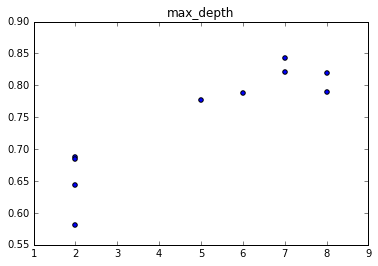

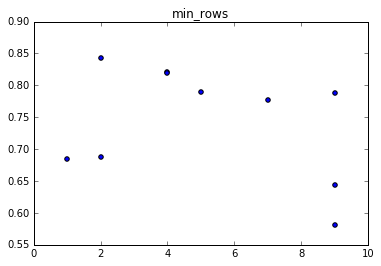

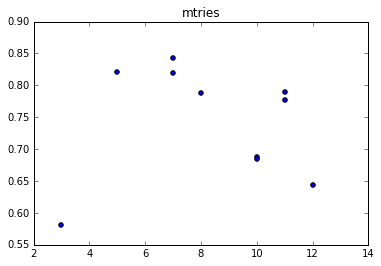

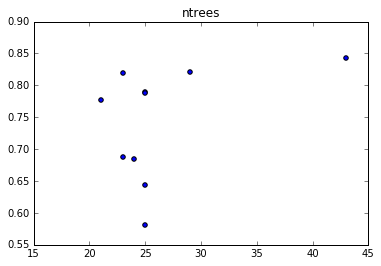

,max_depth,min_rows,mtries,ntrees,score,std
5,7,2,7,43,0.842429,0.131814
3,7,4,5,29,0.821645,0.173161
4,8,4,7,23,0.819062,0.164093
6,8,5,11,25,0.790047,0.181401
0,6,9,8,25,0.787720,0.141917


In [31]:
report_grid_score_detail(random_search).head()

Based on the grid search report, we can narrow the parameters to search and rerun the analysis. The parameters below were chosen after a few runs:

Best R^2: 0.861332724318 

Best params: {'mtries': 8, 'ntrees': 38, 'max_depth': 7}


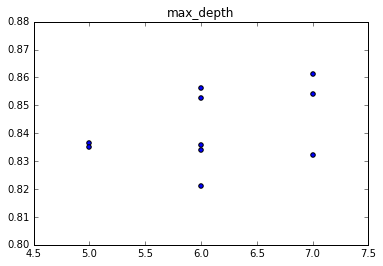

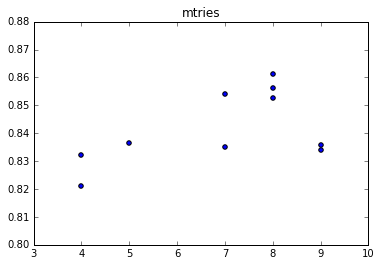

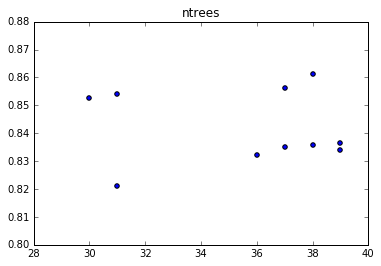

CPU times: user 8.76 s, sys: 1.25 s, total: 10 s
Wall time: 2min 53s


In [32]:
%%time

params = {"ntrees": randint(30,40),
          "max_depth": randint(4,10),
          "mtries": randint(4,10),}

custom_cv = H2OKFold(fr, n_folds=5, seed=42)           # In small datasets, the fold size can have a big
                                                       # impact on the std of the resulting scores. More
random_search = RandomizedSearchCV(model, params,      # folds --> Less examples per fold --> higher 
                                   n_iter=10,          # variation per sample
                                   scoring=scorer, 
                                   cv=custom_cv, 
                                   random_state=43, 
                                   n_jobs=1)       

random_search.fit(fr[x], fr[y])

print "Best R^2:", random_search.best_score_, "\n"
print "Best params:", random_search.best_params_

report_grid_score_detail(random_search)

### Transformations

Rule of machine learning: Don't use your testing data to inform your training data. Unfortunately, this happens all the time when preparing a dataset for the final model. But on smaller datasets, you must be especially careful.

At the moment, there are no classes for managing data transformations. On the one hand, this requires the user to tote around some extra state, but on the other, it allows the user to be more explicit about transforming H2OFrames.

Basic steps:

0. Remove the response variable from transformations.
1. Import transformer
2. Define transformer
3. Fit train data to transformer
4. Transform test and train data
5. Re-attach the response variable.

First let's normalize the data using the means and standard deviations of the training data.
Then let's perform a principal component analysis on the training data and select the top 5 components.
Using these components, let's use them to reduce the train and test design matrices.

In [36]:
from h2o.transforms.preprocessing import H2OScaler
from h2o.transforms.decomposition import H2OPCA

#### Normalize Data: Use the means and standard deviations from the training data.

In [38]:
y_train = train.pop("Median_value")
y_test  = test.pop("Median_value")

In [41]:
norm = H2OScaler()
norm.fit(train)
X_train_norm = norm.transform(train)
X_test_norm  = norm.transform(test)

In [42]:
print X_test_norm.shape
X_test_norm

(122, 13)
H2OFrame with 122 rows and 13 columns: 
       CRIM        ZN         B     LSTAT       AGE       TAX       RAD  CHAS  \
1 -0.246963  0.424524  1.045172  2.090121  1.362634  0.679791 -0.442619     0   
2 -0.255267  0.424524  1.073152  0.886477  1.114751  0.679791 -0.442619     0   
3 -0.257365  0.424524  1.055715  1.062761  0.478372  0.679791 -0.442619     0   
4 -0.209900 -0.036915  1.073152  0.524517  0.808883  0.670933 -0.553274     0   
5 -0.156526 -0.036915  1.073152  1.280226  1.242316  0.670933 -0.553274     0   
6 -0.199229 -0.036915  1.066150  1.105387  1.277107  0.670933 -0.553274     0   
7 -0.197216 -0.036915  1.048741  0.852521  1.281456  0.670933 -0.553274     0   
8 -0.122844 -0.036915  0.668329  1.397267  1.317696  0.670933 -0.553274     0   
9 -0.250168 -0.036915  1.063698  0.659620  0.350806  0.608933 -0.442619     0   

        NOX        RM     INDUS   PTRATIO       DIS  
1  0.920897 -0.526458  0.583824  0.796398  1.326180  
2  0.920897  0.012840  0.583824

Then, we can apply PCA and keep the top 5 components.

In [43]:
pca = H2OPCA(n_components=5)
pca.fit(X_train_norm)
X_train_norm_pca = pca.transform(X_train_norm)
X_test_norm_pca  = pca.transform(X_test_norm)

In [ ]:
# prop of variance explained by top 5 components?

In [44]:
print X_test_norm_pca.shape
X_test_norm_pca[:5]

(122, 5)
H2OFrame with 122 rows and 4 columns: 
        PC1       PC2       PC3       PC4
1  2.775730  0.683315  0.570631  1.084322
2  2.333266  1.074568  0.415494  0.574300
3  2.109439  0.878256  0.403082  0.640434
4  2.108793  0.672244  0.035683  0.791810
5  2.545885  0.464734 -0.080608  0.846926
6  2.471061  0.484356  0.006282  0.972984
7  2.469073  0.796570 -0.154455  0.528450
8  2.457931  0.292708 -0.076225  0.862258
9  1.810514  0.509740 -0.027855  0.716504


In [49]:
model = H2ORandomForestEstimator(seed=42)
model.fit(X_train_norm_pca,y_train)
y_hat  = model.predict(X_test_norm_pca)

In [50]:
h2o_r2_score(y_test,y_hat)

0.6970713453770999

Although this is MUCH simpler than keeping track of all of these transformations manually, it gets to be somewhat of a burden when you want to chain together multiple transformers.

### Pipelines

"Tranformers unite!"

If your raw data is a mess and you have to perform several transformations before using it, use a pipeline to keep things simple.

Steps:

1. Import Pipeline, transformers, and model
2. Define pipeline. The first and only argument is a *list* of *tuples* where the first element of each tuple is a name you give the step and the second element is a defined transformer. The last step is optionally an estimator class (like a RandomForest).
3. Fit the training data to pipeline
4. Either transform or predict the testing data

In [31]:
from h2o.transforms.preprocessing import H2OScaler
from h2o.transforms.decomposition import H2OPCA
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [32]:
from sklearn.pipeline import Pipeline                # Import Pipeline <other imports not shown>
model = H2ORandomForestEstimator(seed=42)
pipe = Pipeline([("standardize", H2OScaler()),       # Define pipeline as a series of steps
                 ("pca", H2OPCA(n_components=5)),
                 ("rf", model)])                     # Notice the last step is an estimator

pipe.fit(train, y_train)                             # Fit training data
y_hat = pipe.predict(test)                           # Predict testing data (due to last step being an estimator)
h2o_r2_score(y_test, y_hat)                          # Notice the final score is identical to before

NameError: name 'y_train' is not defined

This is so much easier!!!

But, wait a second, we did worse after applying these transformations! We might wonder how different hyperparameters for the transformations impact the final score.

### Combining randomized grid search and pipelines
"Yo dawg, I heard you like models, so I put models in your models to model models."

Steps:

1. Import Pipeline, grid search, transformers, and estimators <Not shown below>
2. Define pipeline
3. Define parameters to test in the form: "(Step name)__(argument name)" A double underscore separates the two words.
4. Define grid search
5. Fit to grid search

In [29]:
pipe = Pipeline([("standardize", H2OScaler()),
                 ("pca", H2OPCA(n_components=5)),
                 ("rf", H2ORandomForestEstimator(seed=42))])

params = {"standardize__center":    [True, False],           # Parameters to test
          "standardize__scale":     [True, False],
          "pca__n_components":      randint(2, X.shape[1]),
          "rf__ntrees":             randint(50,100),
          "rf__max_depth":          randint(4,15),
          "rf__min_rows":           randint(1,10), }
#           "rf__mtries":             randint(1,4),}           # gridding over mtries is 
                                                               # problematic with pca grid over 
                                                               # n_components above 

from sklearn.grid_search import RandomizedSearchCV
from h2o.cross_validation import H2OKFold
from h2o.model.regression import h2o_r2_score
from sklearn.metrics.scorer import make_scorer

custom_cv = H2OKFold(X, n_folds=5, seed=42)  ##H2OKFold(y.shape[0], n_folds=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(pipe, params,
                                   n_iter=10,
                                   scoring=make_scorer(h2o_r2_score),
                                   cv=custom_cv,
                                   random_state=42,
                                   n_jobs=1)


random_search.fit(fr[x],fr[y])
results = report_grid_score_detail(random_search)
results.head()

NameError: name 'Pipeline' is not defined

Currently Under Development (drop-in scikit-learn pieces):
    * Richer set of transforms (only PCA and Scale are implemented)
    * Richer set of estimators (only RandomForest is available)
    * Full H2O Grid Search

###Other Tips: Model Save/Load

It is useful to save constructed models to disk and reload them between H2O sessions. Here's how:

In [71]:
best_estimator = random_search.best_estimator_                        # fetch the pipeline from the grid search
h2o_model      = h2o.get_mode(best_estimator._final_estimator._id)    # fetch the model from the pipeline

In [73]:
h2o.save_model(h2o_model, path=".")

u'/Users/spencer/0xdata/h2o-3/./DRF_model_python_1440539007526_1054'

In [74]:
# assumes new session

my_model = h2o.load_model(path='/Users/spencer/0xdata/h2o-3/./DRF_model_python_1440539007526_1054')